# Assignment no 59 (Decision Tree Regressor) (5.4.23)

### **You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:**

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:
https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [2]:
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# descriptive statistics of data

df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As seen in above descriptive statistics some of the features recorded zero value as minimum such as Glucose, BloodPressure, SkinThickness, Insulin and BMI which is not possible in real world and misconcepts to Human Health. Possibility is that there is some error or particular record values are not mentioned by respective patient.

So we have to and will replace the minuimum value with mean or mode depending on characteristic of feature.

<AxesSubplot: >

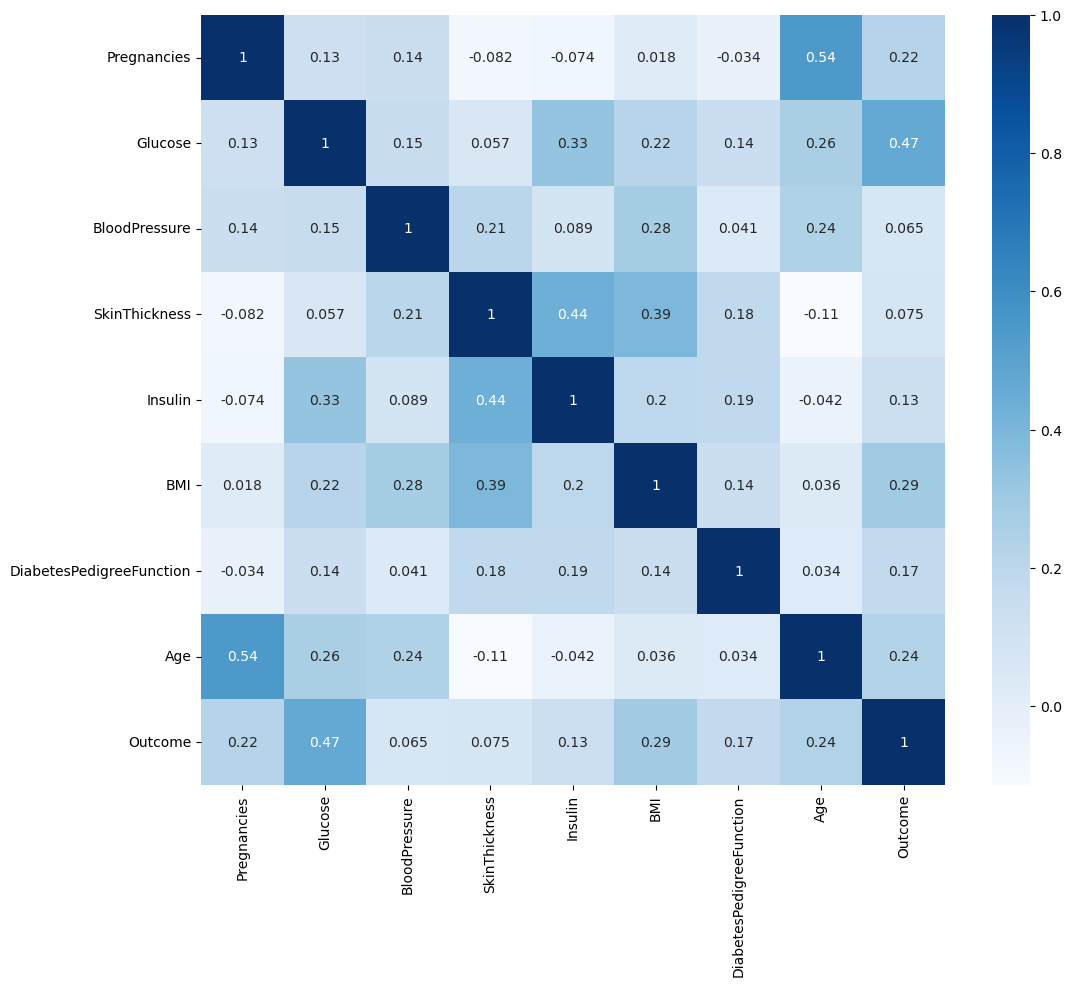

In [4]:
# checking correlation between variables

plt.figure(figsize=(12,10))
sns.heatmap(df_diabetes.corr(), annot=True,cmap='Blues')

In [5]:
pd.DataFrame(df_diabetes.corrwith(df_diabetes['Outcome']).round(2)).transpose()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.0


### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [6]:
# getting information on dataset

df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We dont have any categorical variables, so need to create encoding or dummy variables.

In [7]:
# check for null values.

df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Conclusion - Within Dataset there are no any null values.

In [8]:
# check for missing values.

df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Conclusion - Within Dataset there are no any missing values.

In [9]:
# checking for imbalanced data within target variable

df_diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Conclusion - Categories within 'Outcome' variable are almost more than 50% distribution, so we can say it is imbalanced dataset and there is need for implementing data balancing techniques.

## Checking zero values for independent features which should not be zero and replacing it with mean or mode value of respective feature.

In [10]:
df_diabetes[df_diabetes['Glucose'] == 0].value_counts().sum()

5

Hence we have 5 zero values in 'Glucose' column, we will replace those by mean of that column.

In [11]:
df_diabetes['Glucose'].mean().round()

121.0

In [12]:
df_diabetes['Glucose'].replace(to_replace=0, value=df_diabetes['Glucose'].mean().round(), inplace=True)
df_diabetes[df_diabetes['Glucose'] == 0].value_counts().sum()

0

In [13]:
df_diabetes[df_diabetes['BloodPressure'] == 0].value_counts().sum()

35

Hence we have 35 zero values in 'BloodPressure' column, we will replace those by mode of that column.

In [14]:
df_diabetes[['BloodPressure']].mode()['BloodPressure'][0]

70

In [15]:
df_diabetes['BloodPressure'].replace(to_replace=0, value=df_diabetes[['BloodPressure']].mode()['BloodPressure'][0], inplace=True)
df_diabetes[df_diabetes['BloodPressure'] == 0].value_counts().sum()

0

In [16]:
df_diabetes[df_diabetes['SkinThickness'] == 0].value_counts().sum()

227

Hence we have 227 zero values in 'SkinThickness' column, we will replace those by mean of that column.

In [17]:
df_diabetes['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [18]:
df_diabetes['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [19]:
df_diabetes['SkinThickness'].mean().round()

21.0

In [20]:
max(df_diabetes['SkinThickness']), min(df_diabetes['SkinThickness'])

(99, 0)

In [21]:
df_diabetes['SkinThickness'].replace(to_replace=0, value=df_diabetes['SkinThickness'].mean().round(), inplace=True)
df_diabetes[df_diabetes['SkinThickness'] == 0].value_counts().sum()

0

In [22]:
df_diabetes[df_diabetes['Insulin'] == 0].value_counts().sum()

374

Hence we have 374 zero values in 'Insulin' column, we will replace those by mean of that column.

In [23]:
df_diabetes['Insulin'].mean().round()

80.0

In [24]:
df_diabetes['Insulin'].replace(to_replace=0, value=df_diabetes['Insulin'].mean(), inplace=True)
df_diabetes[df_diabetes['Insulin'] == 0].value_counts().sum()

0

In [25]:
df_diabetes[df_diabetes['BMI'] == 0].value_counts().sum()

11

Hence we have 11 zero values in 'BMI' column, we will replace those by mean of that column.

In [26]:
df_diabetes['BMI'].mode()

0    32.0
Name: BMI, dtype: float64

In [27]:
df_diabetes['BMI'].mean().round()

32.0

In [28]:
df_diabetes['BMI'].replace(to_replace=0, value=df_diabetes['BMI'].mean(), inplace=True)
df_diabetes[df_diabetes['BMI'] == 0].value_counts().sum()

0

In [29]:
df_diabetes.shape

(768, 9)

In [30]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.295573,26.743490,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.106756,9.546733,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.000000,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

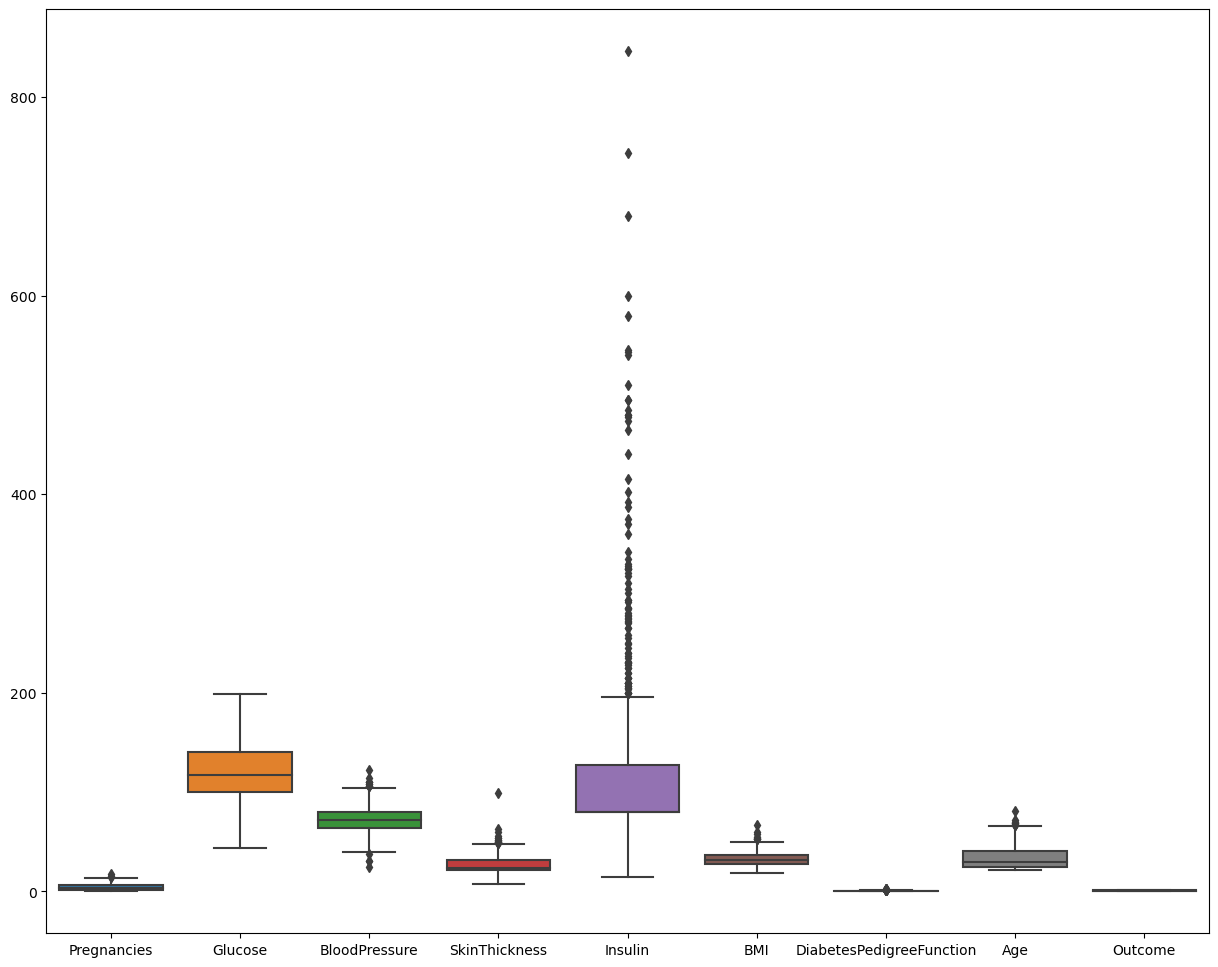

In [31]:
# checking for outliers

plt.figure(figsize=(15,12))
sns.boxplot(data=df_diabetes)

In [32]:
#checking for quartile ranges within features in dataframe.

for column in df_diabetes.columns:
    minimum,Q1,median,Q3,maximum=np.quantile(df_diabetes[column],[0,0.25,0.50,0.75,1.0])
    IQR=(Q3-Q1).round(2)
    lower_fence=(Q1-1.5*(IQR)).round(2)
    higher_fence=(Q3+1.5*(IQR)).round(2)
    print(f"In feature {column} the values for minimum = {minimum} ,Q1 = {Q1} ,median = {median} ,Q3 = {Q3} and maximum = {maximum}.", end='\n')
    print(f"In feature {column} the values for IQR = {IQR} ,lower_fence = {lower_fence} ,and higher_fence = {higher_fence}.", end='\n')
    print("")

In feature Pregnancies the values for minimum = 0.0 ,Q1 = 1.0 ,median = 3.0 ,Q3 = 6.0 and maximum = 17.0.
In feature Pregnancies the values for IQR = 5.0 ,lower_fence = -6.5 ,and higher_fence = 13.5.

In feature Glucose the values for minimum = 44.0 ,Q1 = 99.75 ,median = 117.0 ,Q3 = 140.25 and maximum = 199.0.
In feature Glucose the values for IQR = 40.5 ,lower_fence = 39.0 ,and higher_fence = 201.0.

In feature BloodPressure the values for minimum = 24.0 ,Q1 = 64.0 ,median = 72.0 ,Q3 = 80.0 and maximum = 122.0.
In feature BloodPressure the values for IQR = 16.0 ,lower_fence = 40.0 ,and higher_fence = 104.0.

In feature SkinThickness the values for minimum = 7.0 ,Q1 = 21.0 ,median = 23.0 ,Q3 = 32.0 and maximum = 99.0.
In feature SkinThickness the values for IQR = 11.0 ,lower_fence = 4.5 ,and higher_fence = 48.5.

In feature Insulin the values for minimum = 14.0 ,Q1 = 79.79947916666667 ,median = 79.79947916666667 ,Q3 = 127.25 and maximum = 846.0.
In feature Insulin the values for IQR = 

In [33]:
# checking values of outliers within respective feature.

for column in df_diabetes.columns:
    minimum,Q1,median,Q3,maximum=np.quantile(df_diabetes[column],[0,0.25,0.50,0.75,1.0])
    IQR=(Q3-Q1).round(2)
    lower_fence=(Q1-1.5*(IQR)).round(2)
    higher_fence=(Q3+1.5*(IQR)).round(2)
    outliers = []
    for value in df_diabetes[column]:
        if value > higher_fence or value < lower_fence:
            outliers.append(value)

    print(f"The values of min and max for '{column}' are {minimum} and {maximum} resp.")
    print(f"The values of lower_fence and upper_fence for '{column}' are {lower_fence} and {higher_fence} resp. and outliers are {outliers} with total number of '{len(outliers)}'.")
    print(f"The values of outliers for '{column}' are {outliers} with total number of '{len(outliers)}'.")
    print("")

The values of min and max for 'Pregnancies' are 0.0 and 17.0 resp.
The values of lower_fence and upper_fence for 'Pregnancies' are -6.5 and 13.5 resp. and outliers are [15, 17, 14, 14] with total number of '4'.
The values of outliers for 'Pregnancies' are [15, 17, 14, 14] with total number of '4'.

The values of min and max for 'Glucose' are 44.0 and 199.0 resp.
The values of lower_fence and upper_fence for 'Glucose' are 39.0 and 201.0 resp. and outliers are [] with total number of '0'.
The values of outliers for 'Glucose' are [] with total number of '0'.

The values of min and max for 'BloodPressure' are 24.0 and 122.0 resp.
The values of lower_fence and upper_fence for 'BloodPressure' are 40.0 and 104.0 resp. and outliers are [30, 110, 108, 122, 30, 110, 108, 110, 24, 38, 106, 106, 106, 114] with total number of '14'.
The values of outliers for 'BloodPressure' are [30, 110, 108, 122, 30, 110, 108, 110, 24, 38, 106, 106, 106, 114] with total number of '14'.

The values of min and max 

### Now that we have found the outliers we can drop those rows from dataset.

In [34]:
df_diabetes.shape

(768, 9)

In [35]:
#checking for quartile ranges within Pregnancies feature.

min_preg,Q1_preg,med_preg,Q3_preg,max_preg=np.quantile(df_diabetes['Pregnancies'],[0,0.25,0.50,0.75,1.0])
IQR_preg=(Q3_preg-Q1_preg).round(2)
lower_fence_preg=(Q1_preg-1.5*(IQR_preg)).round(2)
higher_fence_preg=(Q3_preg+1.5*(IQR_preg)).round(2)
print(f"In feature Pregnancies the values for minimum = {min_preg} ,Q1 = {Q1_preg} ,median = {med_preg} ,Q3 = {Q3_preg} and maximum = {max_preg}.", end='\n')
print(f"In feature Pregnancies the values for IQR = {IQR_preg} ,lower_fence = {lower_fence_preg} ,and higher_fence = {higher_fence_preg}.", end='\n')

In feature Pregnancies the values for minimum = 0.0 ,Q1 = 1.0 ,median = 3.0 ,Q3 = 6.0 and maximum = 17.0.
In feature Pregnancies the values for IQR = 5.0 ,lower_fence = -6.5 ,and higher_fence = 13.5.


In [36]:
for value in df_diabetes['Pregnancies']:
    if value<lower_fence_preg or value>higher_fence_preg:
        print(value)

15
17
14
14


In [37]:
df_diabetes[df_diabetes['Pregnancies'] > higher_fence_preg]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110.000000,37.1,0.153,43,1
159,17,163,72,41,114.000000,40.9,0.817,47,1
298,14,100,78,25,184.000000,36.6,0.412,46,1
455,14,175,62,30,79.799479,33.6,0.212,38,1


In [38]:
df_diabetes.drop([88,159,298,455], axis=0, inplace=True)

In [39]:
df_diabetes.shape

(764, 9)

In [40]:
df_diabetes[df_diabetes['Pregnancies'] > higher_fence_preg]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [41]:
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

In [42]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,79.799479,33.6,0.627,50
1,1,85,66,29,79.799479,26.6,0.351,31
2,8,183,64,21,79.799479,23.3,0.672,32
3,1,89,66,23,94.000000,28.1,0.167,21
4,0,137,40,35,168.000000,43.1,2.288,33


In [43]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((611, 8), (153, 8), (611,), (153,))

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [46]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


classifier = DecisionTreeClassifier()

In [47]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [50]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [51]:
best_params=grid_search.best_estimator_
best_params

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='log2',
                       random_state=42)

In [52]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2', random_state=42)

In [53]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2', random_state=42)

In [54]:
Y_pred = clf.predict(X_test)
Y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

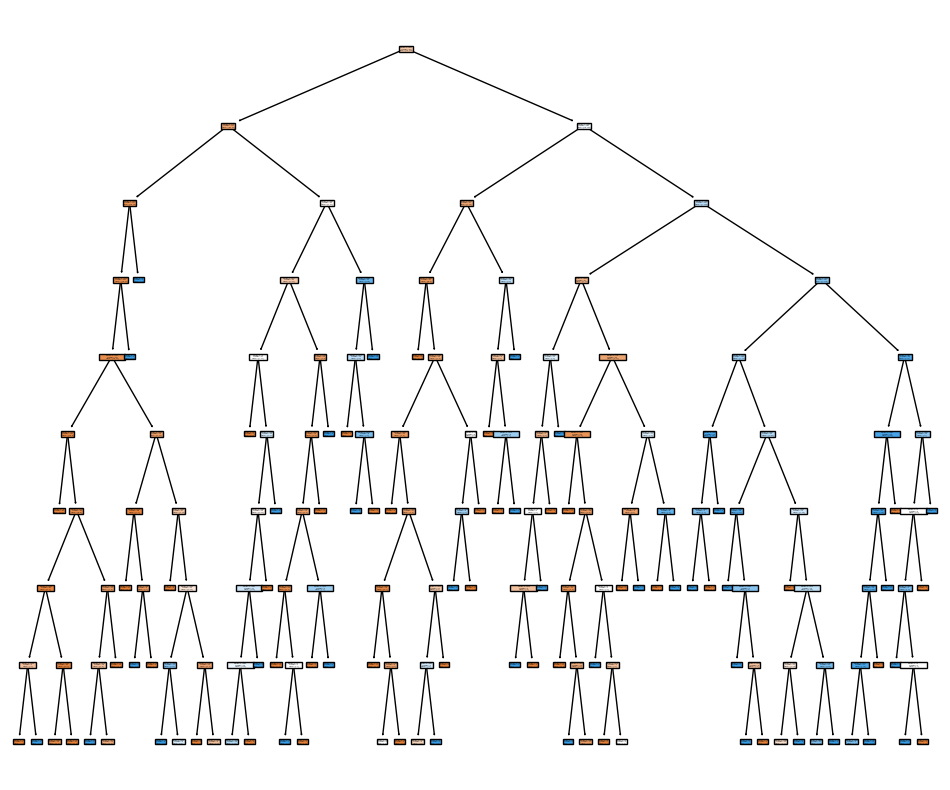

In [55]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(clf,filled=True, feature_names=df_diabetes.columns)
plt.show()

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [56]:
# to calculate accuracy_score for Decsion tree without Hyperparameter Tuning

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy_score(y_test, y_pred).round(2)

0.71

In [58]:
# to calculate confusion_matrix for Decsion tree

confusion_matrix(y_test, y_pred).round(2)

array([[81, 27],
       [17, 28]])

In [61]:
# to get classification report for Decsion tree model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       108
           1       0.51      0.62      0.56        45

    accuracy                           0.71       153
   macro avg       0.67      0.69      0.67       153
weighted avg       0.73      0.71      0.72       153



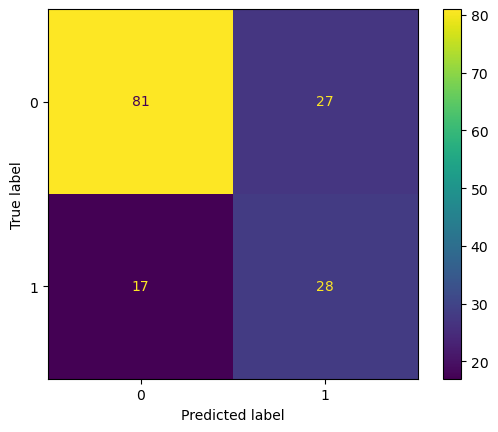

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

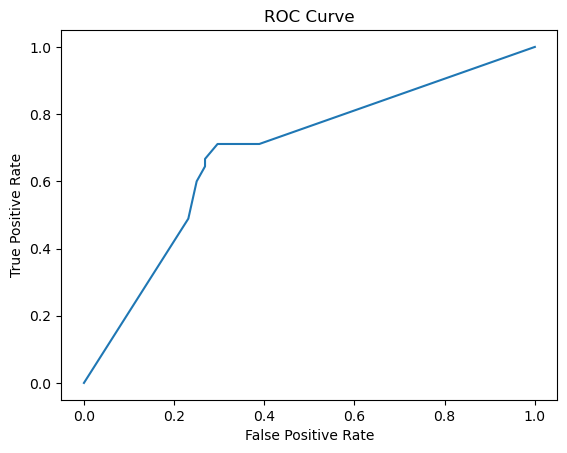

In [64]:
#ROC curve
from sklearn.metrics import roc_curve

y_proba = clf.predict_proba(X_test)[:, 1]  #use the probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

#plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [65]:
# to calculate accuracy_score for Decsion tree with Hyperparameter Tuning

accuracy_score(y_test, Y_pred).round(2)

0.71

## Remarks on the results
As can be seen in the plots, the model is performing very poorly on new data.

1. The classification report gives us the overview of the overall performance of the model. As expected, due to the class imbalance, the recall score of class 1 is very low (which can be confirmed by looking at the confusion matrix as well)
2. The confusion matrix tells us that the model is performing very bad on predicting class 1 instances (again, because of the imbalance), the performance on class 0 is comparitively better than class 1 but its not good enough to be considered reliable.
3. The ROC curve once again, confirms the fact that the true positive rate of the model is barely good.

### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

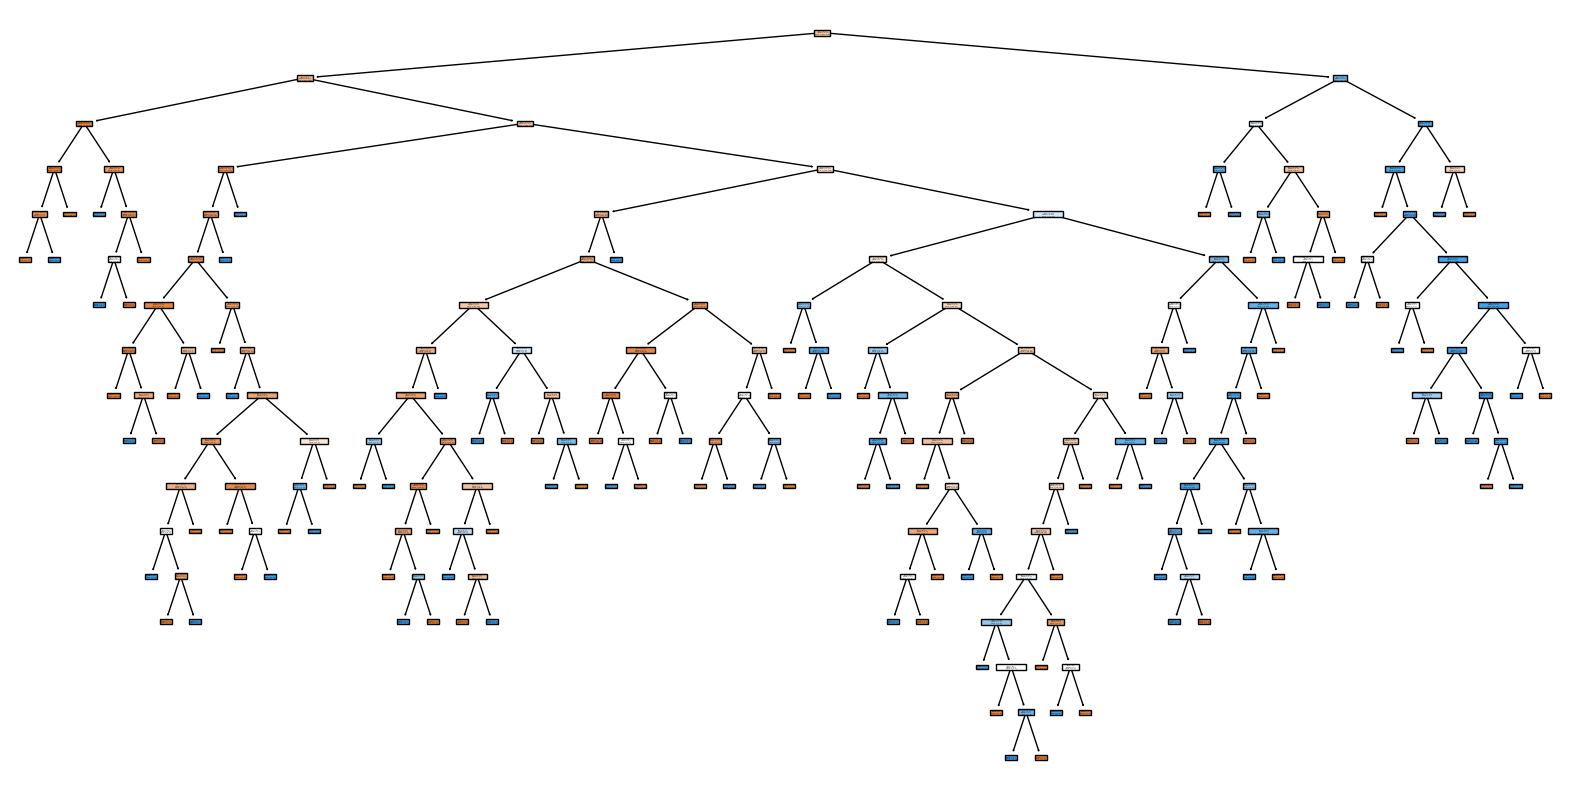

In [67]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier,filled=True, feature_names=X_train.columns)
plt.show()

## Interpretation of the tree:

1. The root node of the three is BMI, the tree uses this feature and the threshold 26.35 to further split the data into subsets.
2. Each leaf node corresponds to a final decision or prediction.

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

The model scores and metrics are very bad, so its obvious that the model will perform poorly on new data but I'll still take a couple of samples from the test set to further validate it.

In [69]:
samples = X_test[1:20]
samples

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
261,3,141,70,21,79.799479,30.0,0.761,27
754,8,154,78,32,79.799479,32.4,0.443,45
195,5,158,84,41,210.000000,39.4,0.395,29
336,0,117,70,21,79.799479,33.8,0.932,44
589,0,73,70,21,79.799479,21.1,0.342,25
760,2,88,58,26,16.000000,28.4,0.766,22
138,0,129,80,21,79.799479,31.2,0.703,29
67,2,109,92,21,79.799479,42.7,0.845,54
222,7,119,70,21,79.799479,25.2,0.209,37
212,7,179,95,31,79.799479,34.2,0.164,60


In [70]:
true_y = y_test[1:20]
true_y

261    1
754    1
195    1
336    0
589    0
760    0
138    0
67     0
222    0
212    0
201    0
431    0
237    1
399    1
66     1
330    0
545    1
573    0
510    1
Name: Outcome, dtype: int64

In [71]:
pred_y = clf.predict(samples)
pred_y

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0])

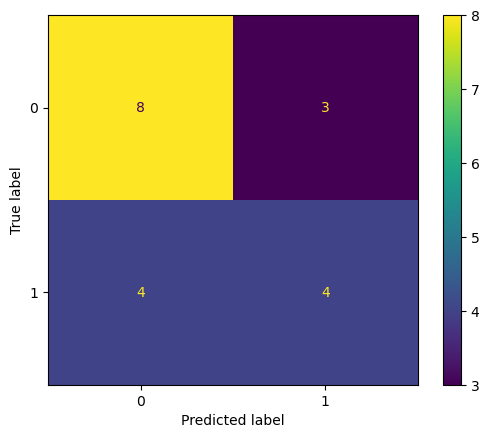

In [72]:
cm = confusion_matrix(true_y, pred_y, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()